Author: Vignesh Tallam

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_target = cancer['target']
df_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

In [ ]:
scaler_rs = RobustScaler()
robust_df = scaler_rs.fit_transform(df)
robust_df = pd.DataFrame(robust_df, columns = df.columns)
robust_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,3.126978,-0.316669,3.599086,4.713606,0.006382,1.475994,1.032641,0.698529,1.358173,1.301299,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,0.889655,-0.584440,0.634495,1.812363,-0.387974,-0.380485,-0.270401,0.349265,-0.581731,0.149351,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500


In [ ]:
scaler_ss = StandardScaler()
standard_df = scaler_ss.fit_transform(df)
standard_df = pd.DataFrame(standard_df, columns = df.columns)
standard_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [ ]:
scaler_mm = MinMaxScaler()
minmax_df = scaler_mm.fit_transform(df)
minmax_df = pd.DataFrame(minmax_df, columns = df.columns)
minmax_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878


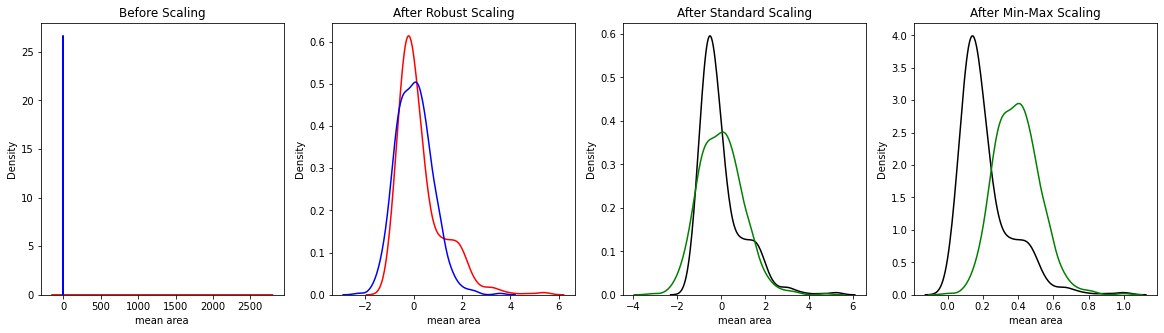

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(df['mean area'], ax = ax1, color ='r')
sns.kdeplot(df['mean smoothness'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['mean area'], ax = ax2, color ='red')
sns.kdeplot(robust_df['mean smoothness'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['mean area'], ax = ax3, color ='black')
sns.kdeplot(standard_df['mean smoothness'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['mean area'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['mean smoothness'], ax = ax4, color ='g')
plt.show()

**PCA**

In [ ]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Second Component')

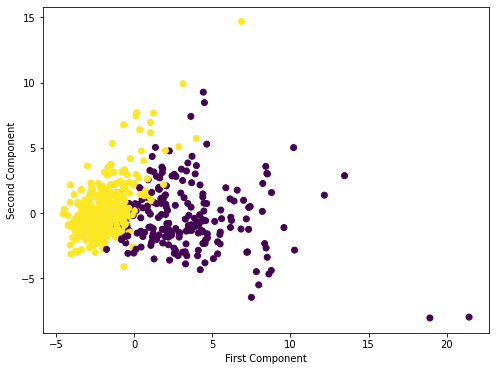

In [ ]:
# PCA on robust scaled data
pca_robust = PCA(n_components = 2)
robust_pca = pca_robust.fit_transform(robust_df)

plt.figure(figsize = (8,6))
plt.scatter(robust_pca[:,0], robust_pca[:,1], c = cancer['target'])
plt.xlabel('First Component')
plt.ylabel('Second Component')

In [ ]:
df_comp_rs = pd.DataFrame(pca_robust.components_, columns= cancer['feature_names'])
df_comp_rs

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.209532,0.081283,0.210221,0.242520,0.097363,0.187554,0.208072,0.195761,0.105479,0.036322,0.285065,0.025717,0.296539,0.419117,0.022647,0.156933,0.174931,0.168461,0.052504,0.117536,0.209570,0.070107,0.209982,0.252790,0.081646,0.156528,0.168535,0.168418,0.092276,0.090951
1,-0.171915,-0.022578,-0.150024,-0.192939,0.139129,0.158300,0.089638,0.004796,0.166600,0.321075,-0.096110,0.091351,-0.076866,-0.228951,0.216015,0.274055,0.295445,0.164971,0.199462,0.385522,-0.157438,-0.014631,-0.135003,-0.191461,0.133427,0.151980,0.116137,0.023206,0.141500,0.267315


Text(0, 0.5, 'Second Component')

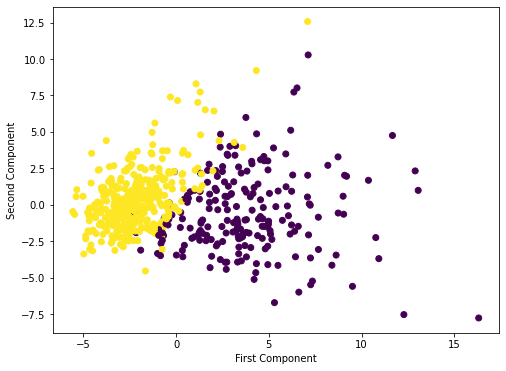

In [ ]:
#PCA on standard scaled data
pca_standard = PCA(n_components = 2)
standard_pca = pca_standard.fit_transform(standard_df)

plt.figure(figsize = (8,6))
plt.scatter(standard_pca[:,0], standard_pca[:,1], c = cancer['target'])
plt.xlabel('First Component')
plt.ylabel('Second Component')

In [ ]:
df_comp_ss = pd.DataFrame(pca_standard.components_, columns= cancer['feature_names'])
df_comp_ss

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,0.205979,0.017428,0.211326,0.202870,0.014531,0.170393,0.153590,0.183417,0.042498,0.102568,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,-0.105552,0.089980,-0.089457,-0.152293,0.204430,0.232716,0.197207,0.130322,0.183848,0.280092,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


Text(0, 0.5, 'Second Component')

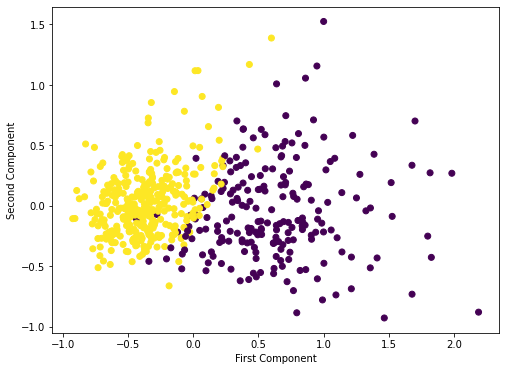

In [ ]:
#PCA on minmax scaled data
pca_minmax = PCA(n_components = 2)
minmax_pca = pca_minmax.fit_transform(minmax_df)

plt.figure(figsize = (8,6))
plt.scatter(minmax_pca[:,0], minmax_pca[:,1], c = cancer['target'])
plt.xlabel('First Component')
plt.ylabel('Second Component')

In [ ]:
df_comp_mm = pd.DataFrame(pca_minmax.components_, columns= cancer['feature_names'])
df_comp_mm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.242676,0.096479,0.25255,0.216495,0.109695,0.240398,0.301914,0.322475,0.111432,0.043298,0.121761,-0.000039,0.118581,0.103569,-0.004684,0.129320,0.065681,0.124746,0.014490,0.045501,0.259387,0.113833,0.260708,0.205918,0.123774,0.204993,0.244084,0.371065,0.095923,0.094634
1,-0.261317,-0.059058,-0.23859,-0.231107,0.199884,0.213915,0.113811,-0.008312,0.211115,0.406392,-0.066899,0.060011,-0.051416,-0.082963,0.135596,0.222353,0.102793,0.105647,0.140475,0.171995,-0.244282,-0.039682,-0.211635,-0.198979,0.229455,0.198064,0.154982,0.044329,0.151169,0.258092


Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'GBDT':gbdt
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
# FOR ROBUST SCALED DATA

X_train_rs,X_test_rs,y_train_rs,y_test_rs = train_test_split(robust_df,df_target,test_size=0.3,random_state=101)

In [ ]:
accuracy_scores_rs = []
precision_scores_rs = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train_rs,y_train_rs,X_test_rs,y_test_rs)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    accuracy_scores_rs.append(current_accuracy)
    precision_scores_rs.append(current_precision)

              precision    recall  f1-score   support

           0       0.70      0.73      0.71        66
           1       0.82      0.80      0.81       105

    accuracy                           0.77       171
   macro avg       0.76      0.76      0.76       171
weighted avg       0.77      0.77      0.77       171

For  SVC
Accuracy -  0.7719298245614035
Precision -  0.8235294117647058


              precision    recall  f1-score   support

           0       0.97      0.89      0.93        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

For  KN
Accuracy -  0.9473684210526315
Precision -  0.9363636363636364


              precision    recall  f1-score   support

           0       0.91      0.89      0.90        66
           1       0.93      0.94      0.94       105

    accuracy                       

In [ ]:
performance_df_rs = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores_rs,'Precision':precision_scores_rs}).sort_values('Precision',ascending=False)
performance_df_rs

,Algorithm,Accuracy,Precision
3,LR,0.970760,0.962963
5,AdaBoost,0.970760,0.962963
6,BgC,0.953216,0.961905
4,RF,0.953216,0.953271
7,GBDT,0.941520,0.952381
1,KN,0.947368,0.936364
2,DT,0.923977,0.933962
0,SVC,0.771930,0.823529


In [ ]:
# FOR STANDARD SCALED DATA

X_train_ss,X_test_ss,y_train_ss,y_test_ss = train_test_split(standard_df,df_target,test_size=0.3,random_state=101)

In [ ]:
accuracy_scores_ss = []
precision_scores_ss = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train_ss,y_train_ss,X_test_ss,y_test_ss)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    accuracy_scores_ss.append(current_accuracy)
    precision_scores_ss.append(current_precision)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        66
           1       0.90      0.92      0.91       105

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.88       171
weighted avg       0.89      0.89      0.89       171

For  SVC
Accuracy -  0.8888888888888888
Precision -  0.8981481481481481


              precision    recall  f1-score   support

           0       0.98      0.89      0.94        66
           1       0.94      0.99      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

For  KN
Accuracy -  0.9532163742690059
Precision -  0.9369369369369369


              precision    recall  f1-score   support

           0       0.90      0.91      0.90        66
           1       0.94      0.93      0.94       105

    accuracy                       

In [ ]:
performance_df_ss = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores_ss,'Precision':precision_scores_ss}).sort_values('Precision',ascending=False)
performance_df_ss

,Algorithm,Accuracy,Precision
3,LR,0.976608,0.980952
5,AdaBoost,0.970760,0.962963
6,BgC,0.953216,0.961905
4,RF,0.953216,0.953271
7,GBDT,0.947368,0.952830
2,DT,0.923977,0.942308
1,KN,0.953216,0.936937
0,SVC,0.888889,0.898148


In [ ]:
# FOR MINMAX SCALED DATA

X_train_mm,X_test_mm,y_train_mm,y_test_mm = train_test_split(minmax_df,df_target,test_size=0.3,random_state=101)

In [ ]:
accuracy_scores_mm = []
precision_scores_mm = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train_ss,y_train_ss,X_test_ss,y_test_ss)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    accuracy_scores_mm.append(current_accuracy)
    precision_scores_mm.append(current_precision)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        66
           1       0.90      0.92      0.91       105

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.88       171
weighted avg       0.89      0.89      0.89       171

For  SVC
Accuracy -  0.8888888888888888
Precision -  0.8981481481481481


              precision    recall  f1-score   support

           0       0.98      0.89      0.94        66
           1       0.94      0.99      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

For  KN
Accuracy -  0.9532163742690059
Precision -  0.9369369369369369


              precision    recall  f1-score   support

           0       0.90      0.91      0.90        66
           1       0.94      0.93      0.94       105

    accuracy                       

In [ ]:
performance_df_mm = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores_ss,'Precision':precision_scores_ss}).sort_values('Precision',ascending=False)
performance_df_mm

,Algorithm,Accuracy,Precision
3,LR,0.976608,0.980952
5,AdaBoost,0.970760,0.962963
6,BgC,0.953216,0.961905
4,RF,0.953216,0.953271
7,GBDT,0.947368,0.952830
2,DT,0.923977,0.942308
1,KN,0.953216,0.936937
0,SVC,0.888889,0.898148


In [ ]:
# So Logisitic Regression Algorithm is working best with all 3 different scaled dataset. The Highest Score is from Logistic Regression with Standard Scaled Data or MinMax Scaled Data
# Further we can apply hyperparameter tuning to improve our results